## Feature Engineering

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import seaborn as sns

In [15]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Text(0, 0.5, 'Count')

<Figure size 1200x600 with 0 Axes>

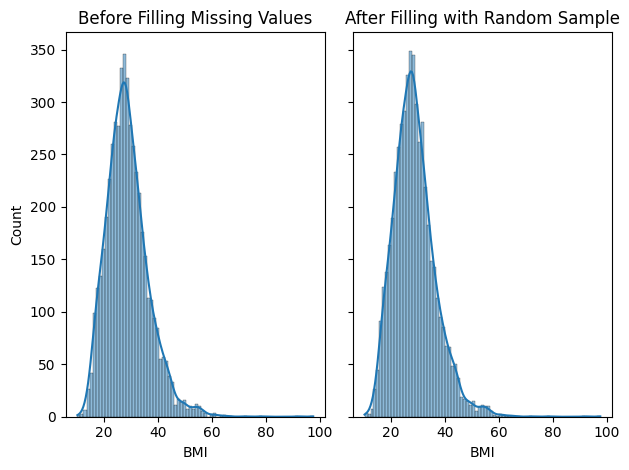

In [16]:

before = df.copy()
# Find missing values
missing_bmi = df["bmi"].isna()

# Sample random values from existing BMI (with replacement)
random_bmis = df.loc[~missing_bmi, "bmi"].sample(missing_bmi.sum(), replace=True, random_state=42)
df.loc[missing_bmi, "bmi"] = random_bmis.values

plt.figure(figsize=(12, 6))
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].set_title("Before Filling Missing Values")
sns.histplot(data=before, x="bmi", kde=True, ax=axs[0])
axs[0].set_xlabel("BMI")
axs[0].set_ylabel("Count")

axs[1].set_title("After Filling with Random Sample")
sns.histplot(data=df, x="bmi", kde=True, ax=axs[1])
axs[1].set_xlabel("BMI")
axs[1].set_ylabel("Count")

### Penambahan Feature

In [17]:
# Fitur Agregat atau Gabungan
df['risk_score'] = (
        df['hypertension'] +
        df['heart_disease'] +
        (df['smoking_status'] == 'smokes').astype(int) +
        (df['bmi'] >= 30).astype(int)
    )
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,risk_score
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.8,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1


In [18]:
# Fitur Interaksi 
df['age_bmi_interaction'] = df['age'] * df['bmi']
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,risk_score,age_bmi_interaction
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2,2452.2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.8,never smoked,1,0,1756.8
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2,2600.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2,1685.6
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,1896.0


In [19]:
# Fitur Transformasi Berbasis Kondisi (Conditional Features)
bmi_bins = [0, 18.5, 24.9, 29.9, 150]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels)

age_bins = [0, 18, 40, 60, 120]
age_labels = ['Child', 'Adult', 'Middle-Aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,risk_score,age_bmi_interaction,bmi_category,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,2,2452.2,Obese,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.8,never smoked,1,0,1756.8,Overweight,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,2,2600.0,Obese,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2,1685.6,Obese,Middle-Aged
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,1896.0,Normal,Senior


In [20]:
# Mengecek apakah ada data kosong setelah feature engineering
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status         0
stroke                 0
risk_score             0
age_bmi_interaction    0
bmi_category           0
age_group              0
dtype: int64

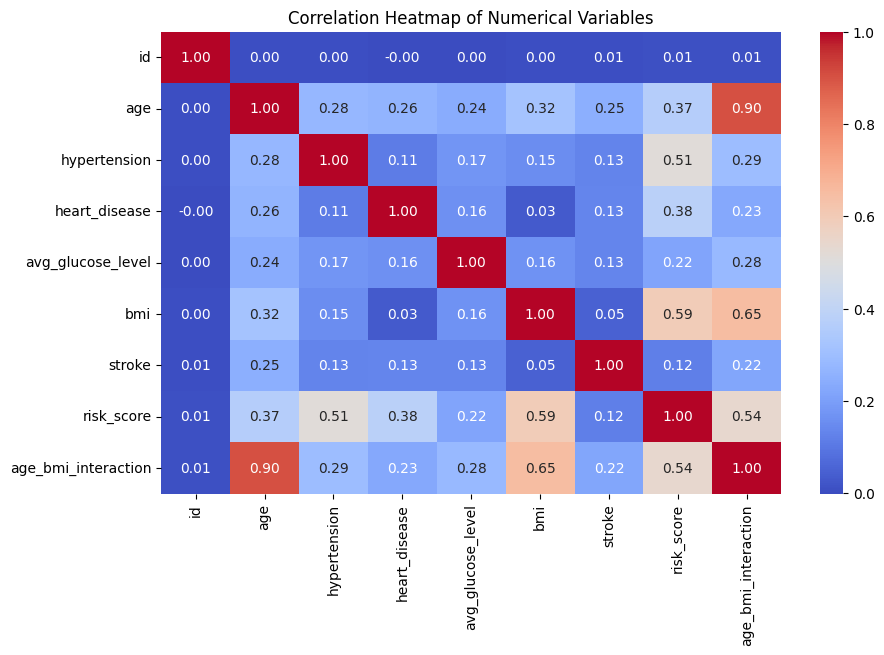

In [21]:
# Corelation matrix untuk mengecek korelasi fitur yang telah dibuat
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

In [22]:
# save ke .csv
df.to_csv("data/stroke-data-feat-eng.csv")

## One-hot encoding

In [23]:
# untuk one hot encoding pada beberapa fitur biner
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})


df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
# Drop any 'Other' genders if still present (not enough for modeling)
df = df[df['gender'].isin([0, 1])]
df['gender'] = df['gender'].astype(int)

In [24]:
# One hot encoding untuk data categorical
categorical_cols = [
     'work_type', 'Residence_type',
    'smoking_status', 'bmi_category', 'age_group'
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

In [25]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,risk_score,...,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese,age_group_Adult,age_group_Middle-Aged,age_group_Senior
0,9046,0,67.0,0,1,1,228.69,36.6,1,2,...,1,1,0,0,0,0,1,0,0,1
1,51676,1,61.0,0,0,1,202.21,28.8,1,0,...,0,0,1,0,0,1,0,0,0,1
2,31112,0,80.0,0,1,1,105.92,32.5,1,2,...,0,0,1,0,0,0,1,0,0,1
3,60182,1,49.0,0,0,1,171.23,34.4,1,2,...,1,0,0,1,0,0,1,0,1,0
4,1665,1,79.0,1,0,1,174.12,24.0,1,1,...,0,0,1,0,1,0,0,0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5109 non-null   int64  
 1   gender                          5109 non-null   int64  
 2   age                             5109 non-null   float64
 3   hypertension                    5109 non-null   int64  
 4   heart_disease                   5109 non-null   int64  
 5   ever_married                    5109 non-null   int64  
 6   avg_glucose_level               5109 non-null   float64
 7   bmi                             5109 non-null   float64
 8   stroke                          5109 non-null   int64  
 9   risk_score                      5109 non-null   int64  
 10  age_bmi_interaction             5109 non-null   float64
 11  work_type_Never_worked          5109 non-null   int64  
 12  work_type_Private               5109 no

In [27]:
# save ke .csv (one-hot encoding)
df.to_csv("data/stroke-data-feat-eng-one-hot.csv")